In [1]:
# STEP 1: Upload kaggle.json
from google.colab import files
files.upload()  # Upload file kaggle.json dari komputermu

# STEP 2: Setup kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# STEP 3: Download dataset dari Kaggle
!kaggle datasets download -d cooperunion/cardataset

# STEP 4: Unzip dataset
!unzip cardataset.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/cooperunion/cardataset
License(s): unknown
  0% 0.00/103k [00:00<?, ?B/s]
100% 103k/103k [00:00<00:00, 257MB/s]
Archive:  cardataset.zip
  inflating: data.csv                


In [2]:
import pandas as pd

df = pd.read_csv("data.csv")  # atau "cars.csv", tergantung isi zip
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Info ringkas dataset
df.info()

# Statistik deskriptif
df.describe()

# Mengecek nilai null
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [4]:
# 1. Isi Engine Fuel Type dengan modus
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)

# 2. Isi Engine HP dan Engine Cylinders dengan median
df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace=True)

# 3. Isi Number of Doors dengan modus
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0], inplace=True)

# 4. Isi Market Category dengan 'Unknown'
df['Market Category'].fillna('Unknown', inplace=True)


/tmp/ipython-input-1932744723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)
/tmp/ipython-input-1932744723.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [5]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


Number of rows: 11914
Number of columns: 16


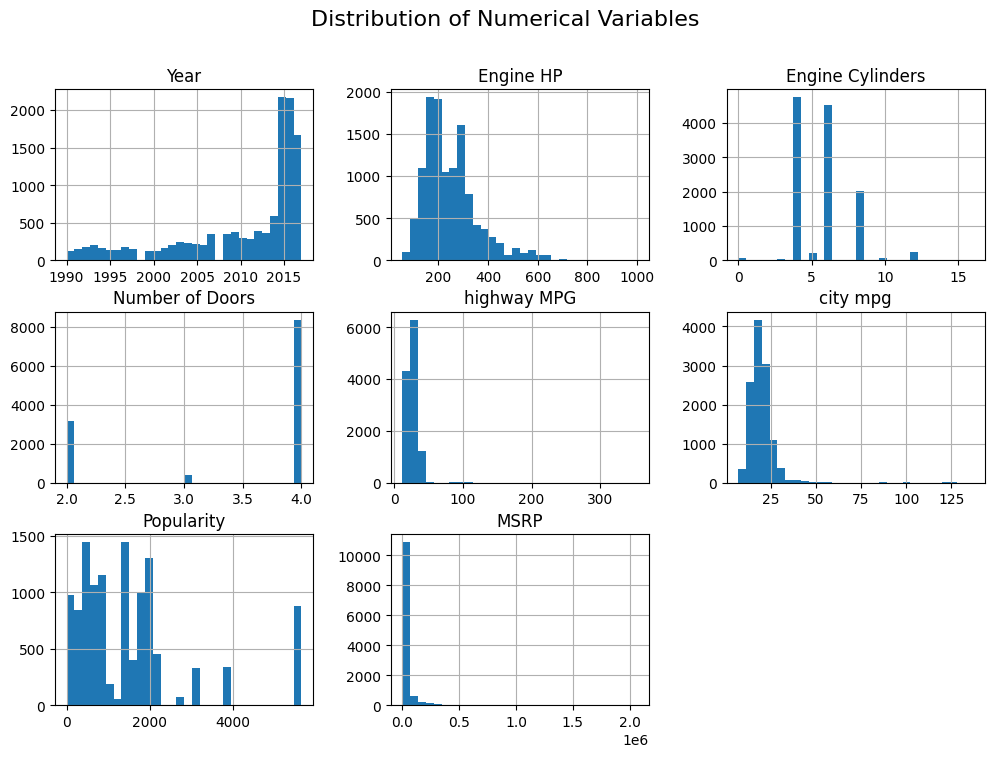

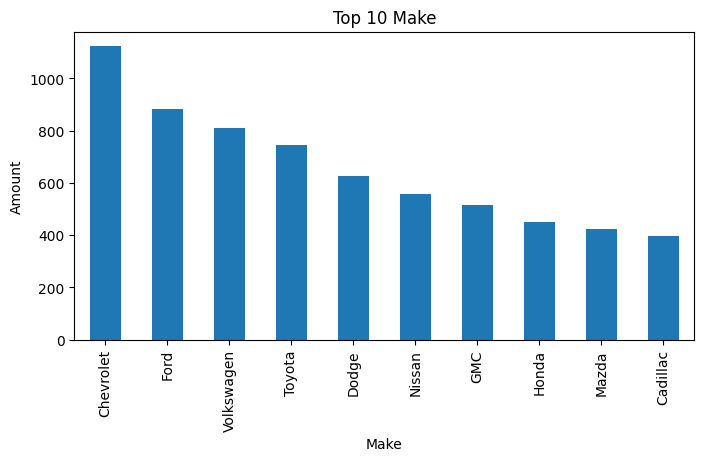

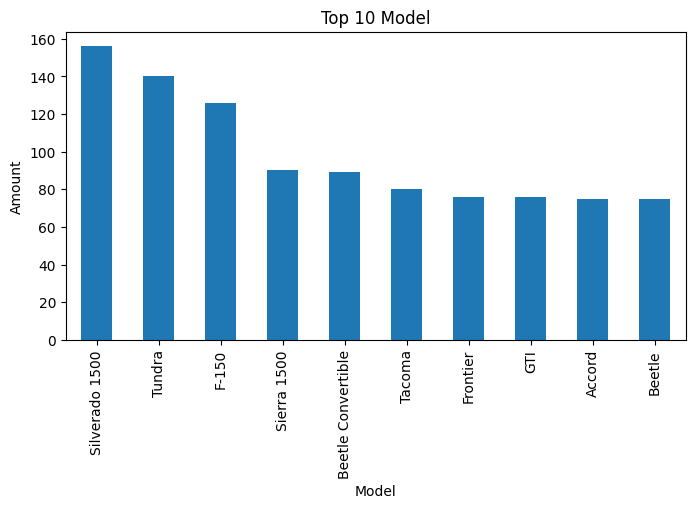

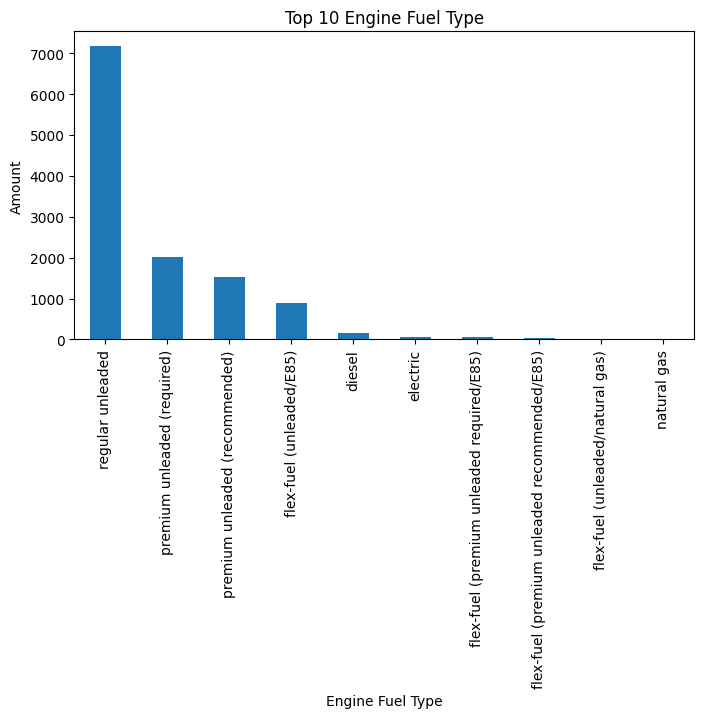

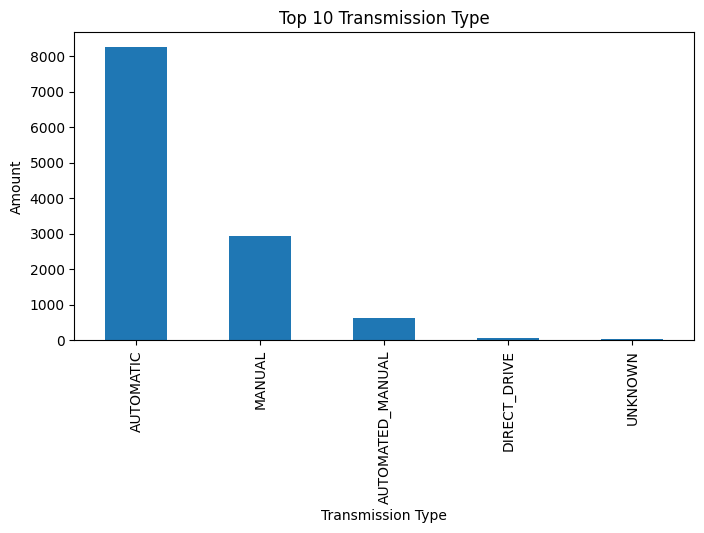

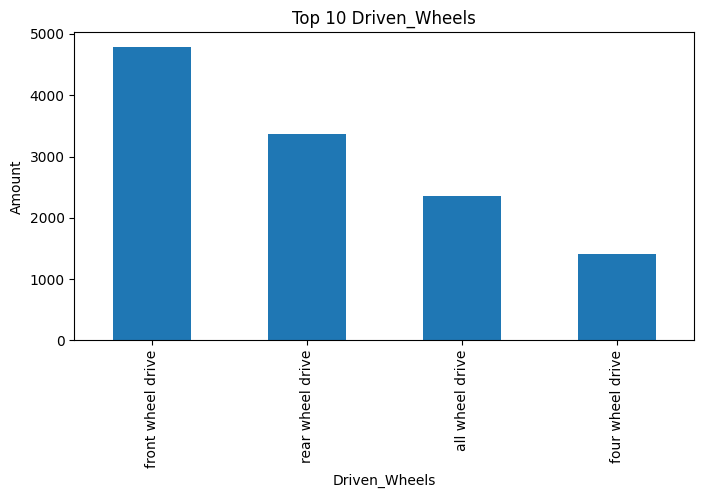

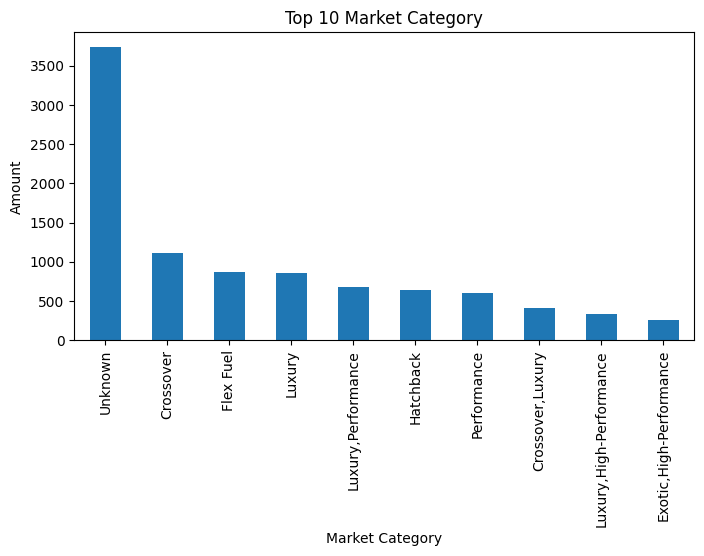

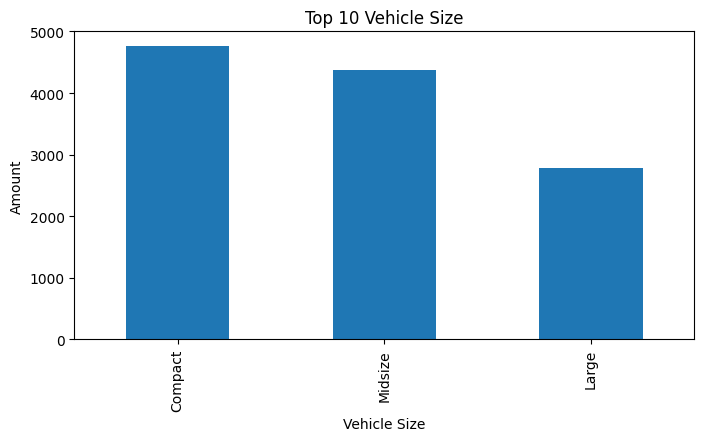

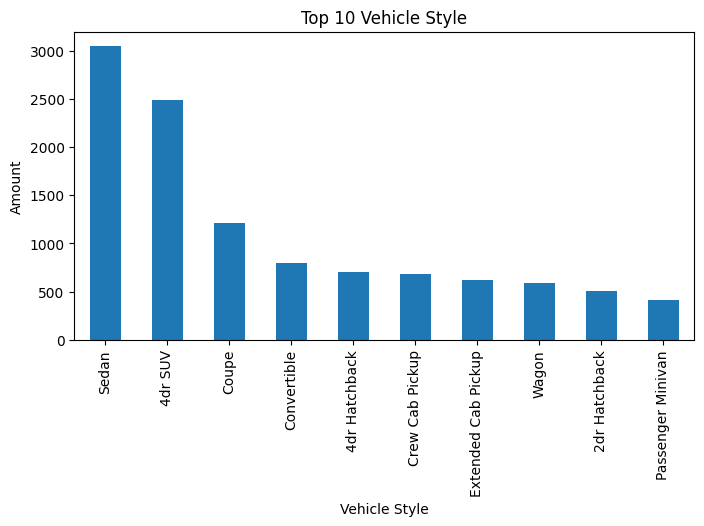

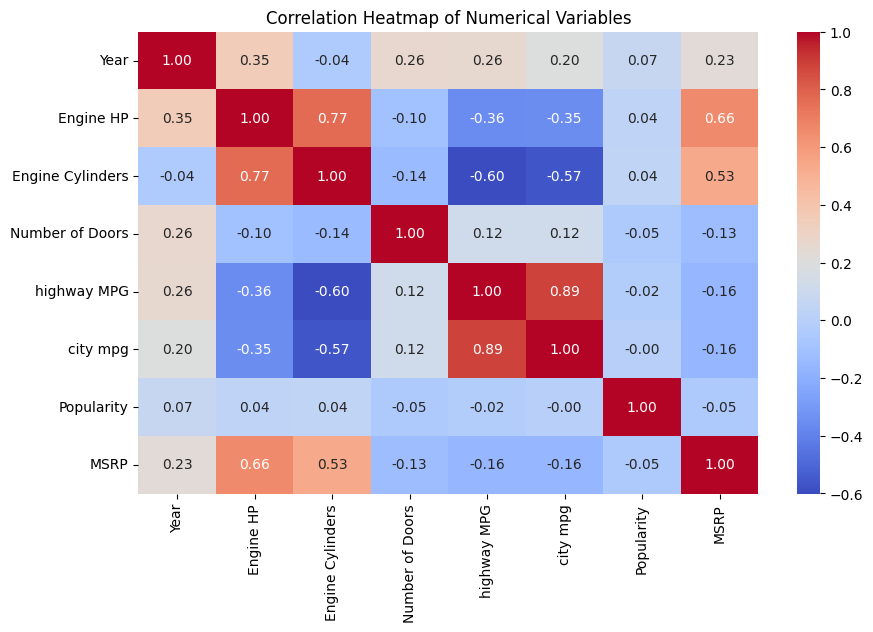

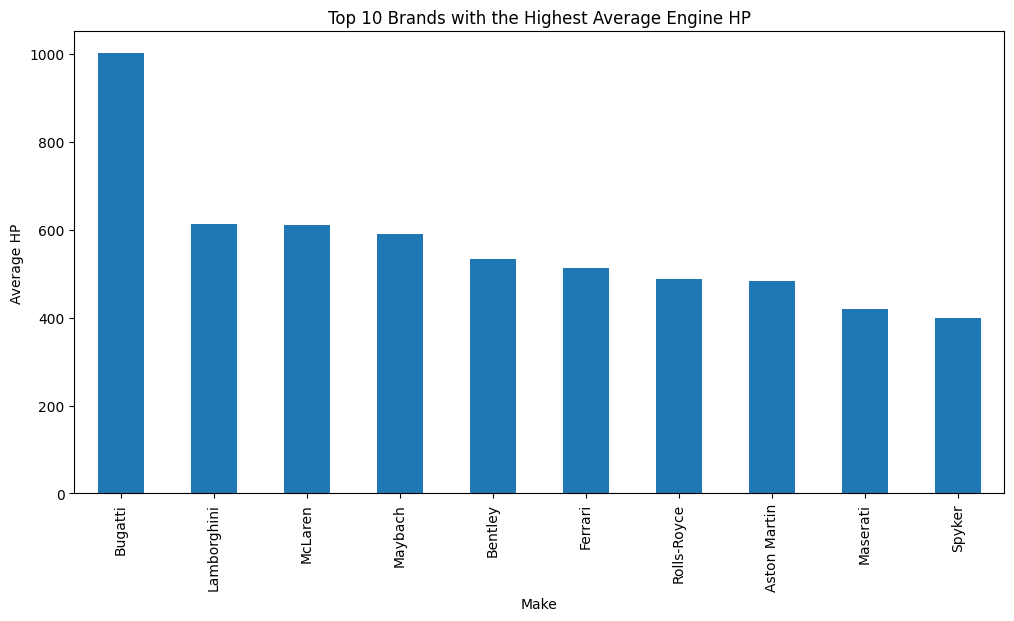

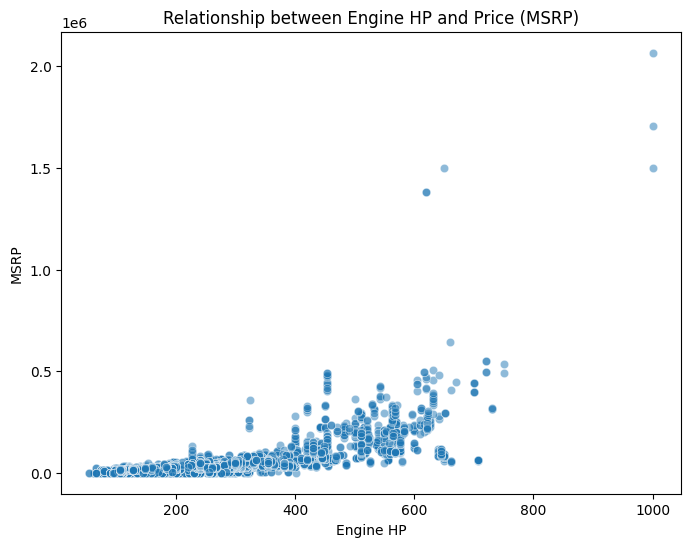

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ukuran dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# 2. Distribusi variabel numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

# 3. Distribusi variabel kategorikal (top 10 frekuensi)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 {col}")
    plt.ylabel("Amount")
    plt.show()

# 4. Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# 5. Perbandingan: Rata-rata HP per Merek
plt.figure(figsize=(12,6))
df.groupby('Make')['Engine HP'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Brands with the Highest Average Engine HP")
plt.ylabel("Average HP")
plt.show()

# 6. Perbandingan: Harga vs HP
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Engine HP', y='MSRP', alpha=0.5)
plt.title("Relationship between Engine HP and Price (MSRP)")
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
plt.show()


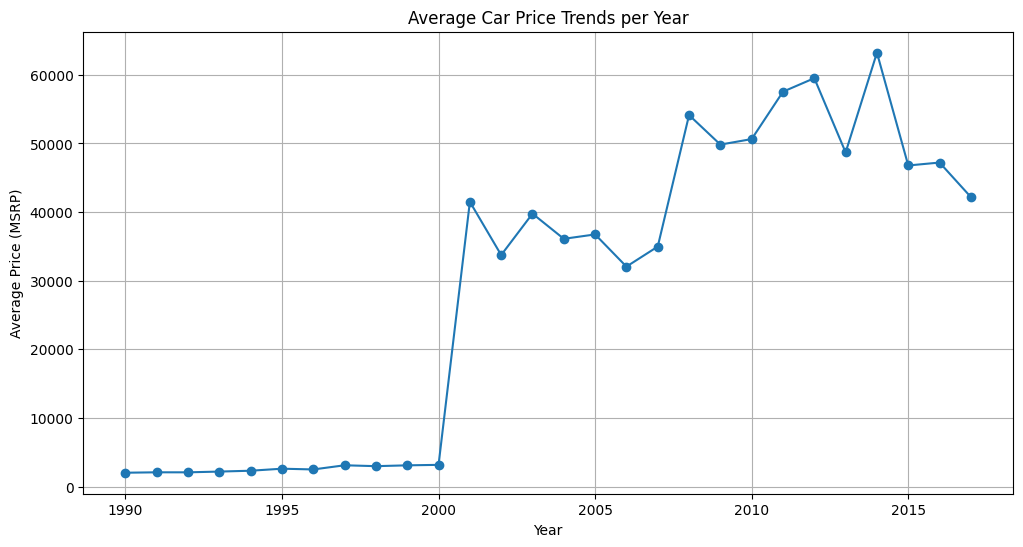

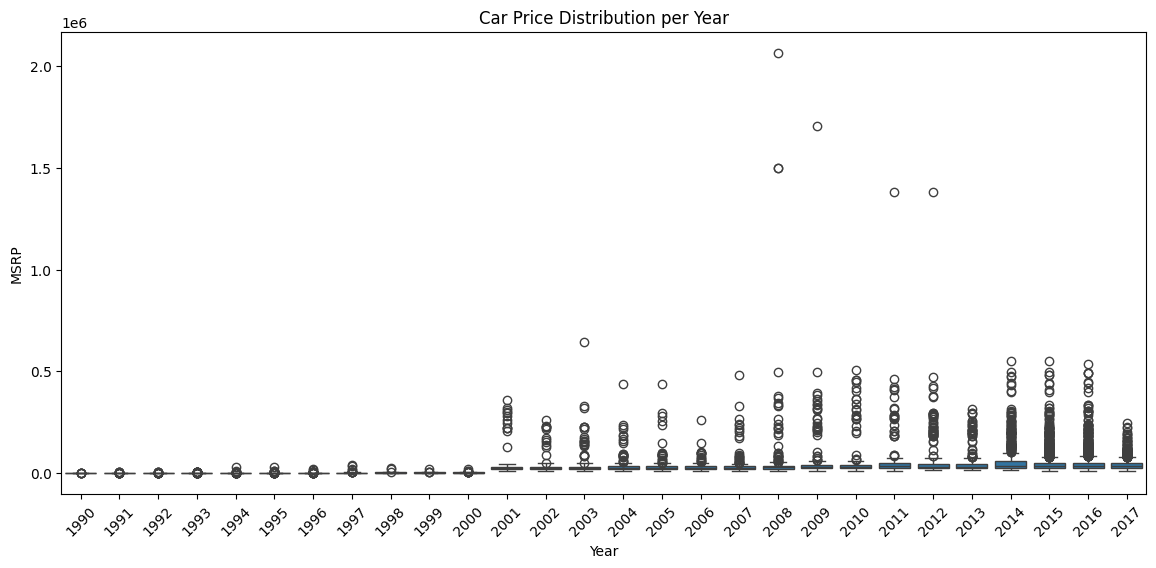

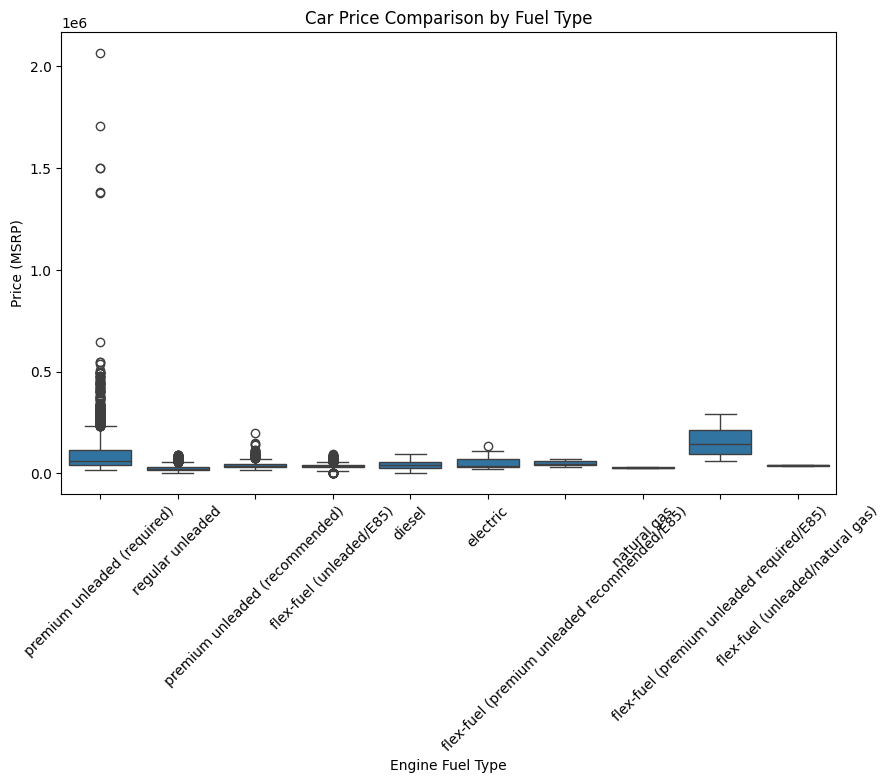

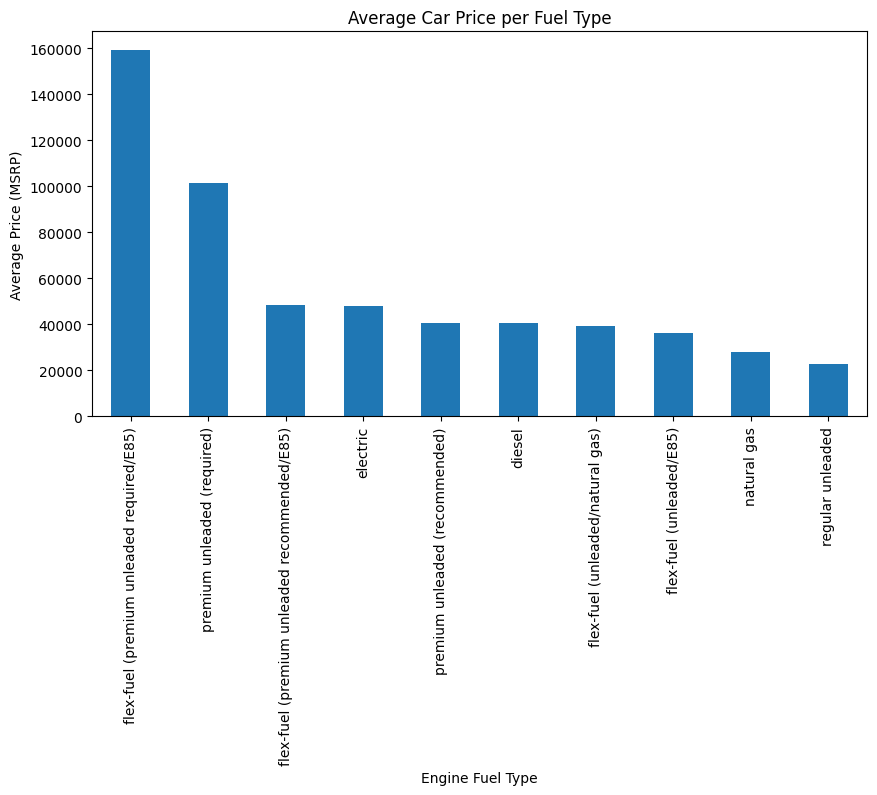

In [9]:
# Pastikan kolom 'Year' ada
if 'Year' in df.columns:
    # 1. Tren rata-rata harga mobil per tahun
    plt.figure(figsize=(12,6))
    df.groupby('Year')['MSRP'].mean().plot(marker='o')
    plt.title("Average Car Price Trends per Year")
    plt.xlabel("Year")
    plt.ylabel("Average Price (MSRP)")
    plt.grid(True)
    plt.show()

    # 2. Sebaran harga mobil per tahun
    plt.figure(figsize=(14,6))
    sns.boxplot(data=df, x='Year', y='MSRP')
    plt.title("Car Price Distribution per Year")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Year' not found in dataset.")

# 3. Perbandingan harga berdasarkan tipe bahan bakar
if 'Engine Fuel Type' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='Engine Fuel Type', y='MSRP')
    plt.title("Car Price Comparison by Fuel Type")
    plt.xticks(rotation=45)
    plt.ylabel("Price (MSRP)")
    plt.show()

    # Rata-rata harga per tipe bahan bakar
    plt.figure(figsize=(10,5))
    df.groupby('Engine Fuel Type')['MSRP'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title("Average Car Price per Fuel Type")
    plt.ylabel("Average Price (MSRP)")
    plt.show()
else:
    print("Column 'Engine Fuel Type' not found in dataset.")


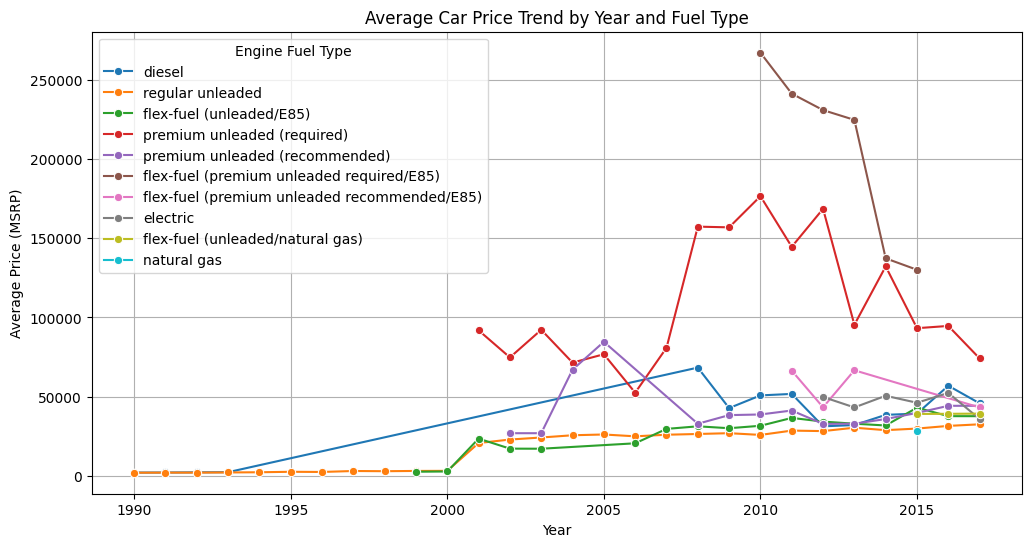

In [10]:
# Combined trend: average car price per year for each fuel type
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure required columns exist
if 'Year' in df.columns and 'Engine Fuel Type' in df.columns:
    # Create a pivot table: average MSRP per year for each fuel type
    price_trend = df.groupby(['Year', 'Engine Fuel Type'])['MSRP'].mean().reset_index()

    # Set figure size
    plt.figure(figsize=(12,6))

    # Line plot for each fuel type
    sns.lineplot(data=price_trend, x='Year', y='MSRP', hue='Engine Fuel Type', marker='o')

    # Chart title and labels
    plt.title("Average Car Price Trend by Year and Fuel Type")
    plt.xlabel("Year")
    plt.ylabel("Average Price (MSRP)")
    plt.legend(title="Engine Fuel Type")
    plt.grid(True)
    plt.show()

else:
    print("Required columns ('Year' and 'Engine Fuel Type') are not found in the dataset.")


In [11]:
# --- Interactive price trend by Year & Fuel Type using Plotly ---

# If Plotly is not available in your environment, uncomment the next line:
# !pip install plotly -q

import numpy as np
import pandas as pd
import plotly.express as px

# =========================
# 1) Basic validations
# =========================
required_cols = {"Year", "Engine Fuel Type", "MSRP"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Required columns are missing from the dataframe: {missing}")

# =========================
# 2) (Optional) Filter to the most common fuel types to reduce clutter
#    - This keeps the chart readable when there are many rare categories.
#    - Adjust 'top_k' to show more/less categories.
# =========================
top_k = 6  # show the top-6 most frequent fuel types
fuel_counts = df["Engine Fuel Type"].value_counts()
top_fuels = fuel_counts.head(top_k).index.tolist()
df_plot = df[df["Engine Fuel Type"].isin(top_fuels)].copy()

# =========================
# 3) Aggregate to average MSRP per (Year, Fuel Type)
# =========================
price_trend = (
    df_plot
    .groupby(["Year", "Engine Fuel Type"], as_index=False)["MSRP"]
    .mean()
    .rename(columns={"MSRP": "Average MSRP"})
    .sort_values(["Year", "Engine Fuel Type"])
)

# Ensure Year is numeric (some datasets may read it as object/string)
price_trend["Year"] = pd.to_numeric(price_trend["Year"], errors="coerce")
price_trend = price_trend.dropna(subset=["Year", "Average MSRP"])

# =========================
# 4) Build interactive line chart
#    - Each fuel type is a separate line.
#    - Legend is interactive: click to hide/show a line, double-click to isolate one.
# =========================
fig = px.line(
    price_trend,
    x="Year",
    y="Average MSRP",
    color="Engine Fuel Type",
    markers=True,
    hover_data={
        "Year": True,
        "Engine Fuel Type": True,
        "Average MSRP": ":,.0f"  # format with thousands separator, no decimals
    },
    title="Interactive Trend: Average Car Price by Year and Fuel Type"
)

# =========================
# 5) Improve layout and hover behavior
# =========================
fig.update_traces(
    mode="lines+markers",
    hovertemplate=(
        "Year: %{x}<br>"
        "Fuel: %{legendgroup}<br>"
        "Avg MSRP: $%{y:,.0f}<extra></extra>"
    )
)

fig.update_layout(
    hovermode="x unified",
    xaxis_title="Year",
    yaxis_title="Average Price (MSRP)",
    yaxis=dict(tickprefix="$", separatethousands=True),
    legend_title_text="Engine Fuel Type",
    margin=dict(l=40, r=20, t=60, b=40)
)

# =========================
# 6) (Optional) Add an on-chart dropdown to quickly filter fuel types
#    - The legend is already interactive, but a dropdown can be handy.
#    - We create buttons for: All + one button per fuel type.
# =========================
fuel_types = price_trend["Engine Fuel Type"].unique().tolist()
# Visibility mask for each trace in the figure (one trace per fuel type)
trace_names = [t.name for t in fig.data]

buttons = []

# Button to show all fuel types
buttons.append(dict(
    label="Show: All",
    method="update",
    args=[{"visible": [True] * len(trace_names)}]
))

# One button per fuel type
for f in fuel_types:
    visible = [name == f for name in trace_names]
    buttons.append(dict(
        label=f"Show: {f}",
        method="update",
        args=[{"visible": visible}]
    ))

fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        x=1.0, xanchor="right",
        y=1.15, yanchor="top",
        buttons=buttons,
        showactive=True
    )]
)

# =========================
# 7) Display the interactive figure
# =========================
fig.show()


Price Depreciation Analysis

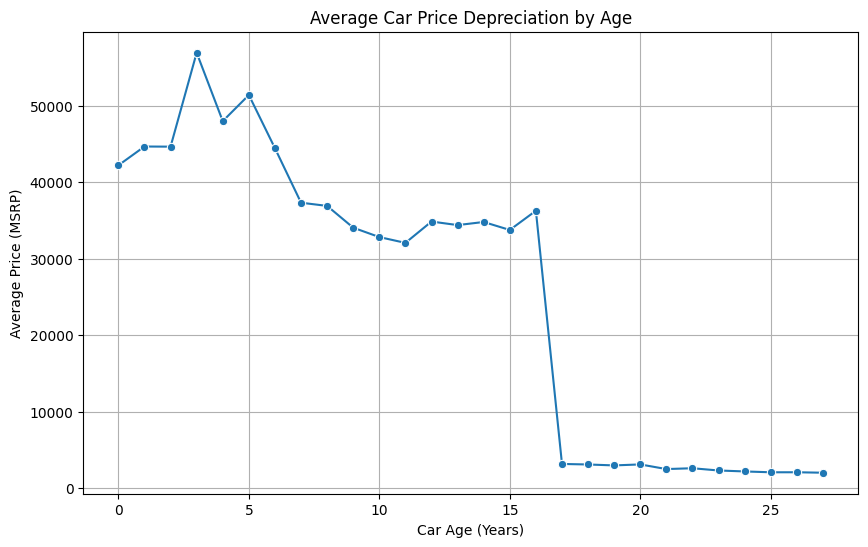

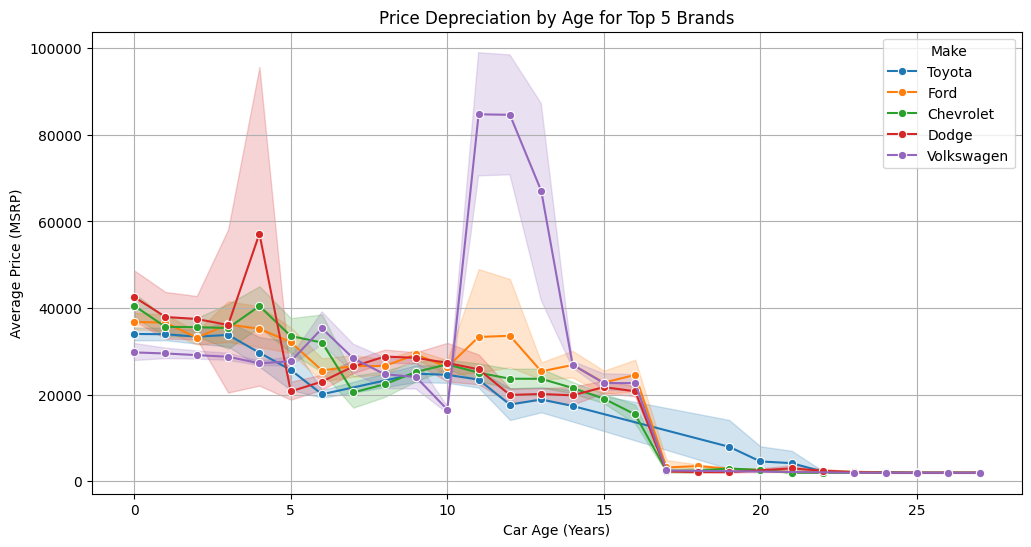

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure Year is numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 2. Get the latest year in the dataset (assuming this is the 'current' year)
latest_year = df["Year"].max()

# 3. Calculate car age
df["Car Age"] = latest_year - df["Year"]

# 4. Filter out extreme values (e.g., MSRP > 300,000)
df_filtered = df[df["MSRP"] < 300_000].copy()

# 5. Group by car age to get average price
age_price = df_filtered.groupby("Car Age")["MSRP"].mean().reset_index()

# 6. Plot average price vs. car age
plt.figure(figsize=(10,6))
sns.lineplot(data=age_price, x="Car Age", y="MSRP", marker="o")
plt.title("Average Car Price Depreciation by Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Average Price (MSRP)")
plt.grid(True)
plt.show()

# 7. OPTIONAL: Compare top 5 brands with the most cars in the dataset
top_brands = df_filtered["Make"].value_counts().head(5).index
df_top = df_filtered[df_filtered["Make"].isin(top_brands)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_top, x="Car Age", y="MSRP", hue="Make", estimator="mean", marker="o")
plt.title("Price Depreciation by Age for Top 5 Brands")
plt.xlabel("Car Age (Years)")
plt.ylabel("Average Price (MSRP)")
plt.grid(True)
plt.show()


The first 1–3 years usually have the steepest price drop (~15–30%).

Luxury brands might depreciate slower in % terms, but lose more in absolute dollars.

Some brands hold their value unusually well — this can be a competitive advantage.

In [13]:
# --- Interactive Price Depreciation Analysis ---

import pandas as pd
import plotly.express as px

# 1. Ensure 'Year' is numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 2. Get the latest year in the dataset
latest_year = df["Year"].max()

# 3. Calculate car age
df["Car Age"] = latest_year - df["Year"]

# 4. Filter out extreme prices to reduce skew
df_filtered = df[df["MSRP"] < 300_000].copy()

# 5. Select top N brands for clarity
top_brands = df_filtered["Make"].value_counts().head(5).index
df_top = df_filtered[df_filtered["Make"].isin(top_brands)]

# 6. Aggregate average price by brand and car age
age_brand_price = (
    df_top.groupby(["Car Age", "Make"], as_index=False)["MSRP"]
    .mean()
    .rename(columns={"MSRP": "Average MSRP"})
    .sort_values(["Car Age", "Make"])
)

# 7. Build interactive line chart
fig = px.line(
    age_brand_price,
    x="Car Age",
    y="Average MSRP",
    color="Make",
    markers=True,
    hover_data={
        "Car Age": True,
        "Make": True,
        "Average MSRP": ":,.0f"  # format as currency
    },
    title="Interactive Price Depreciation by Car Age (Top 5 Brands)"
)

# 8. Improve layout
fig.update_traces(
    mode="lines+markers",
    hovertemplate=(
        "Car Age: %{x} years<br>"
        "Brand: %{legendgroup}<br>"
        "Avg MSRP: $%{y:,.0f}<extra></extra>"
    )
)

fig.update_layout(
    hovermode="x unified",
    xaxis_title="Car Age (Years)",
    yaxis_title="Average Price (MSRP)",
    yaxis=dict(tickprefix="$", separatethousands=True),
    legend_title_text="Make",
    margin=dict(l=40, r=20, t=60, b=40)
)

# 9. Show figure
fig.show()


Predicting Car Price (MSRP Prediction Model)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Create Car Age
latest_year = df["Year"].max()
df["Car Age"] = latest_year - df["Year"]

# 2. Select features and target
features = ["Make", "Model", "Engine Fuel Type", "Engine HP", "Engine Cylinders",
            "Transmission Type", "Driven_Wheels", "Vehicle Size", "Vehicle Style",
            "Market Category", "Car Age"]
target = "MSRP"

X = df[features]
y = df[target]

# 3. Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

# 4. Preprocessing: OneHotEncode categorical, pass numerical unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# 5. Build pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train model
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)

# 9. Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: ${rmse:,.0f}")
print(f"R²: {r2:.2f}")


RMSE: $9,018
R²: 0.97


Top encoded features by permutation importance:


,feature,importance_mean,importance_std,original_col
3,Make_Audi,1.690211e+09,3.183349e+07,Make
4,Make_BMW,4.638970e+08,1.467350e+07,Make
0,Make_Acura,2.146565e+08,1.190203e+07,Make
10,Make_Chrysler,2.058249e+08,1.016439e+07,Make
2,Make_Aston Martin,6.465461e+07,2.862075e+06,Make
9,Make_Chevrolet,5.818241e+07,4.762940e+06,Make
7,Make_Buick,3.714504e+07,6.927704e+06,Make
1,Make_Alfa Romeo,3.645877e+07,1.903573e+05,Make
5,Make_Bentley,3.127059e+07,6.577631e+06,Make
8,Make_Cadillac,1.643777e+07,1.164844e+06,Make



Aggregated permutation importance by original column:


,original_col,importance_mean
0,Make,2.831304e+09


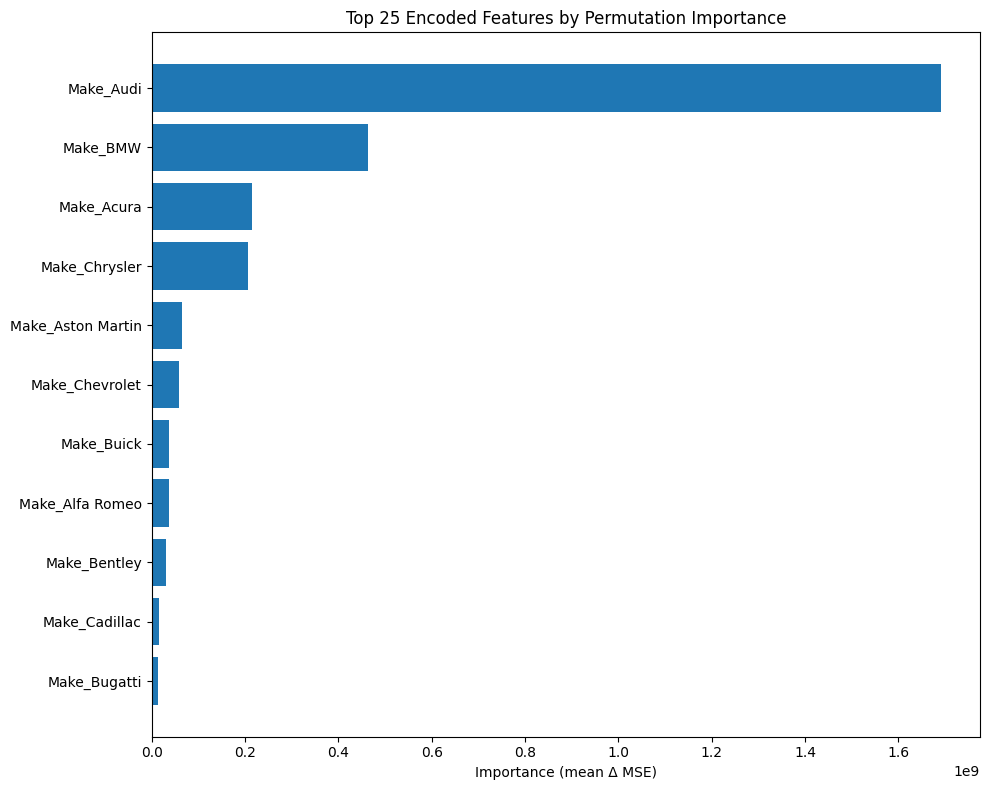

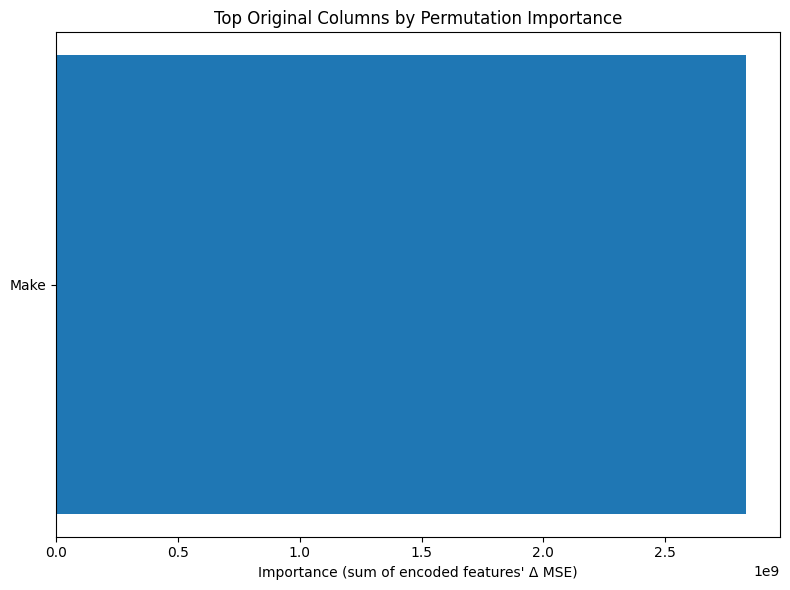

In [17]:
# --- Robust Permutation Feature Importance (shape-safe) ---

from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) Access fitted pieces
pre = model.named_steps["preprocessor"]
reg = model.named_steps["regressor"]

# 1) Get transformed X_test and its true feature count
X_test_t = pre.transform(X_test)
n_features = X_test_t.shape[1]

# 2) Rebuild feature names from the fitted preprocessor
#    - OneHotEncoder names: ohe.get_feature_names_out(cat_cols)
#    - Numeric passthrough: num_cols as-is
ohe = pre.named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(input_features=cat_cols).tolist()

num_feature_names = list(num_cols)  # passthrough keeps original names

feat_names = cat_feature_names + num_feature_names

# Safety check: align lengths if something is off (rare but safer for reruns)
if len(feat_names) != n_features:
    m = min(len(feat_names), n_features)
    feat_names = feat_names[:m]
    # We'll also slice importances to m later

# 3) Permutation importance on the original (untransformed) X_test
perm = permutation_importance(
    model, X_test, y_test,
    n_repeats=8, random_state=42, scoring="neg_mean_squared_error"
)

# 4) Build dataframe (length-align just in case)
m = min(len(feat_names), perm.importances_mean.shape[0])
imp_df = pd.DataFrame({
    "feature": feat_names[:m],
    "importance_mean": perm.importances_mean[:m],
    "importance_std": perm.importances_std[:m]
}).sort_values("importance_mean", ascending=False)

# 5) Map encoded names back to original columns
#    Example encoded names from OHE: "Make_BMW", "Engine Fuel Type_Gasoline"
def original_col_name(encoded_name: str) -> str:
    # Numeric passthrough: keep as the original column
    if encoded_name in num_feature_names:
        return encoded_name
    # Categorical: find which original cat column prefixes the encoded name
    for col in cat_cols:
        prefix = f"{col}_"
        if encoded_name.startswith(prefix):
            return col
    return encoded_name  # fallback

imp_df["original_col"] = imp_df["feature"].apply(original_col_name)

# 6) Aggregate importance by original column
agg_df = (
    imp_df.groupby("original_col", as_index=False)["importance_mean"]
          .sum()
          .sort_values("importance_mean", ascending=False)
)

# 7) Display top encoded features and aggregated columns
print("Top encoded features by permutation importance:")
display(imp_df.head(25))

print("\nAggregated permutation importance by original column:")
display(agg_df.head(20))

# 8) Plots
plt.figure(figsize=(10, 8))
plot_df = imp_df.head(25).iloc[::-1]
plt.barh(plot_df["feature"], plot_df["importance_mean"])
plt.title("Top 25 Encoded Features by Permutation Importance")
plt.xlabel("Importance (mean Δ MSE)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plot_agg = agg_df.head(15).iloc[::-1]
plt.barh(plot_agg["original_col"], plot_agg["importance_mean"])
plt.title("Top Original Columns by Permutation Importance")
plt.xlabel("Importance (sum of encoded features' Δ MSE)")
plt.tight_layout()
plt.show()


True MSRP:      $29,695
Predicted MSRP: $32,958


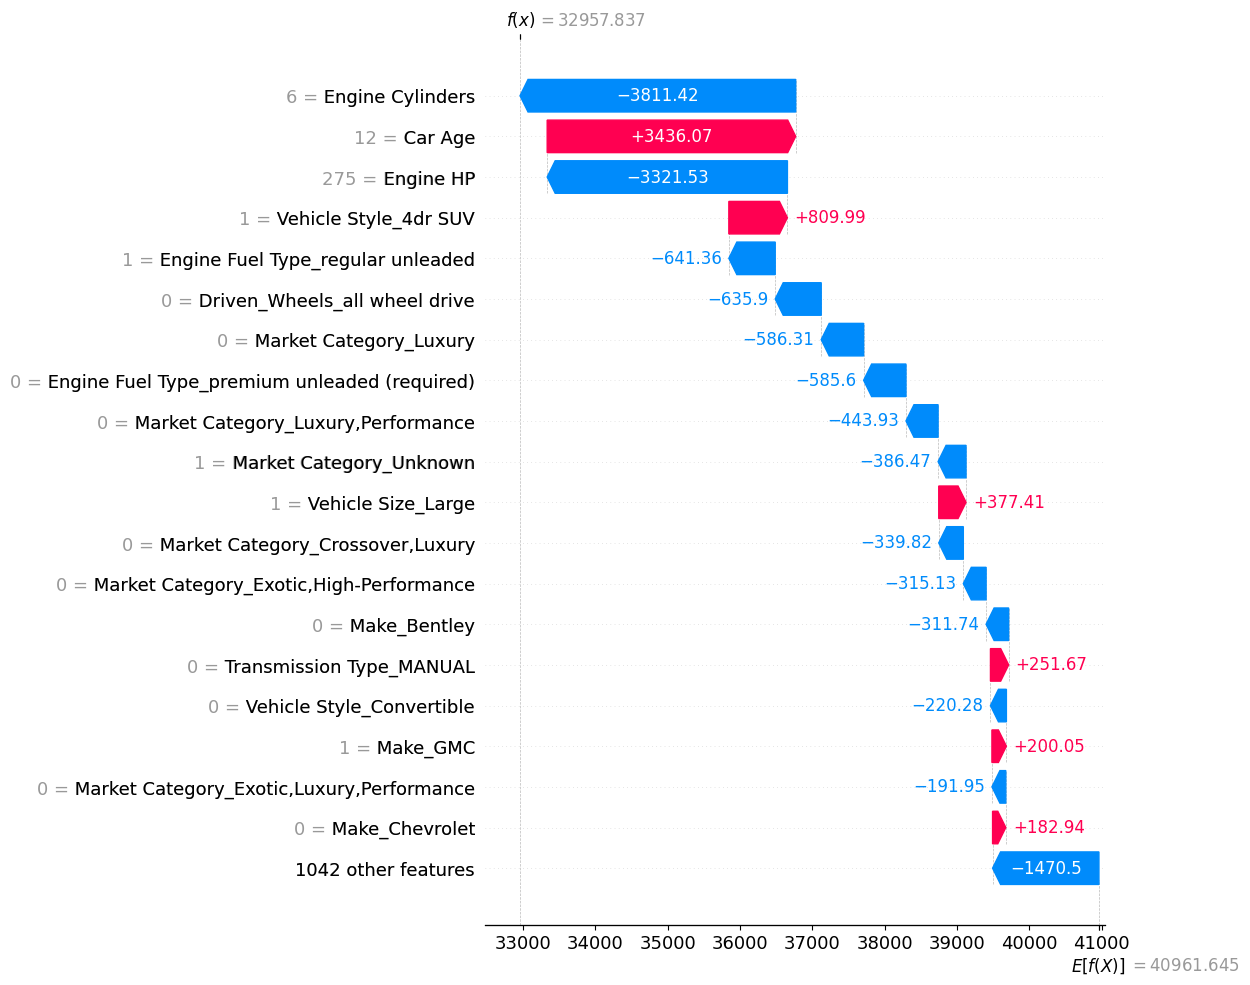

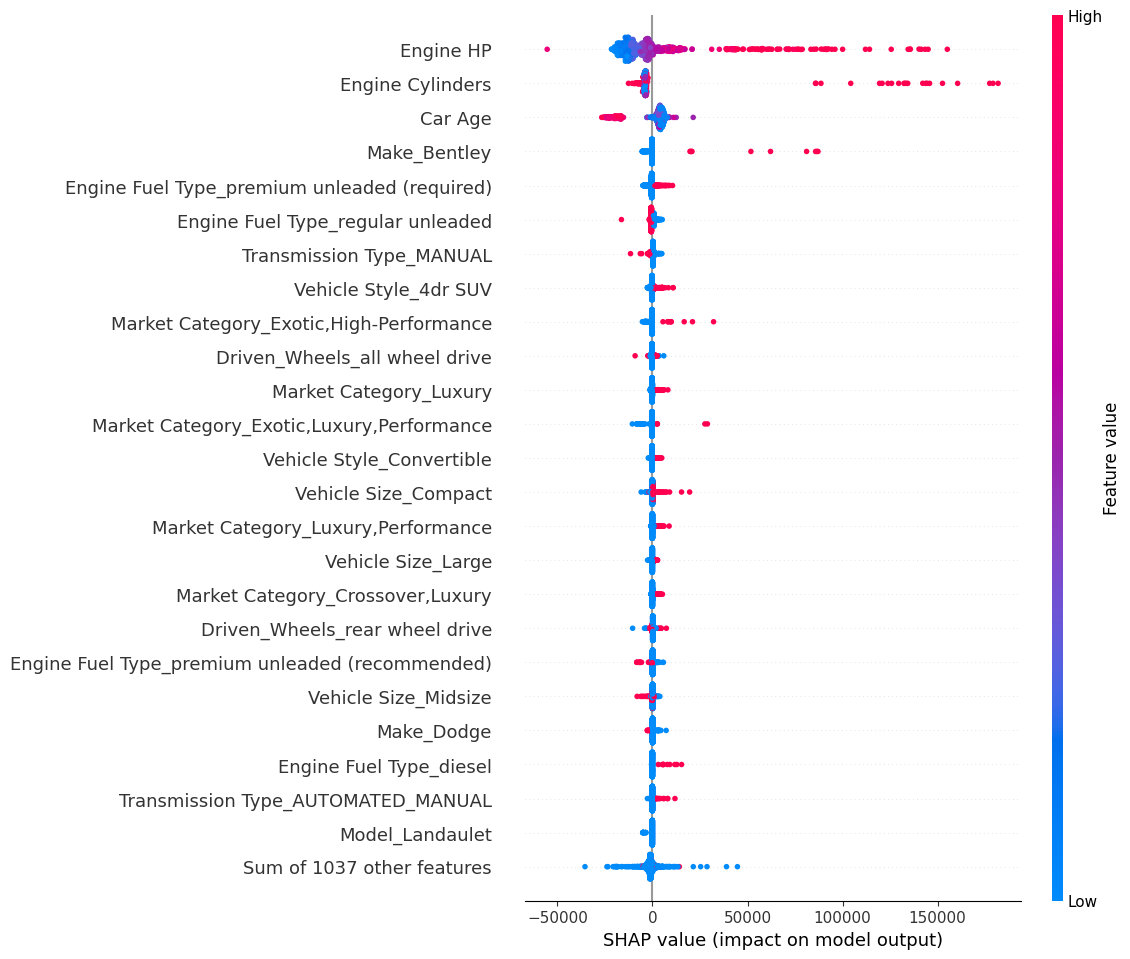


Single-car SHAP (net contribution by original column):


,orig_col,shap_value
0,Car Age,3436.069224
10,Vehicle Style,910.988328
9,Vehicle Size,394.679277
8,Transmission Type,149.259437
5,Make,-462.006038
7,Model,-740.867260
1,Driven_Wheels,-836.856623
3,Engine Fuel Type,-1340.948399
6,Market Category,-2381.175922
4,Engine HP,-3321.527326



Global SHAP (importance by original column):


,orig_col,mean_abs_shap
4,Engine HP,14300.373449
2,Engine Cylinders,6832.127127
0,Car Age,6544.460342
6,Market Category,3094.835146
5,Make,2950.217828
7,Model,2428.118771
3,Engine Fuel Type,2360.428683
10,Vehicle Style,1557.396972
1,Driven_Wheels,1087.548026
8,Transmission Type,919.874100


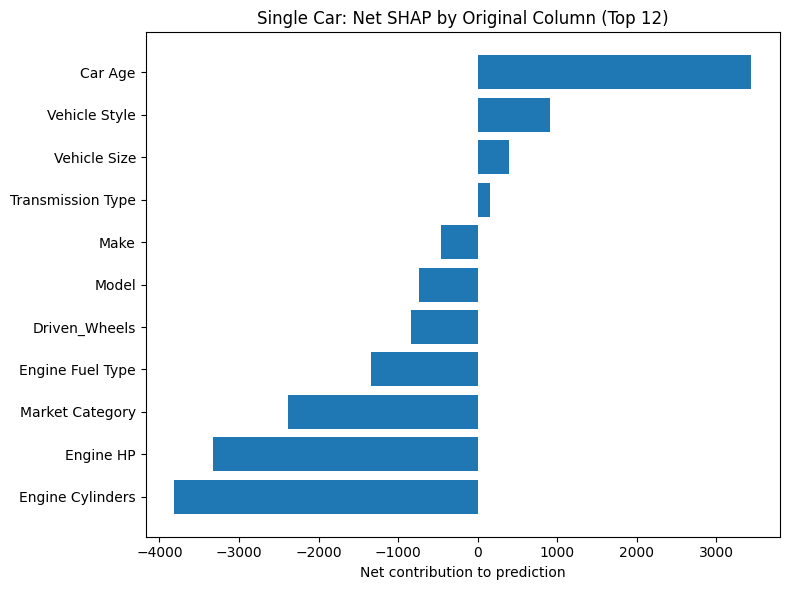

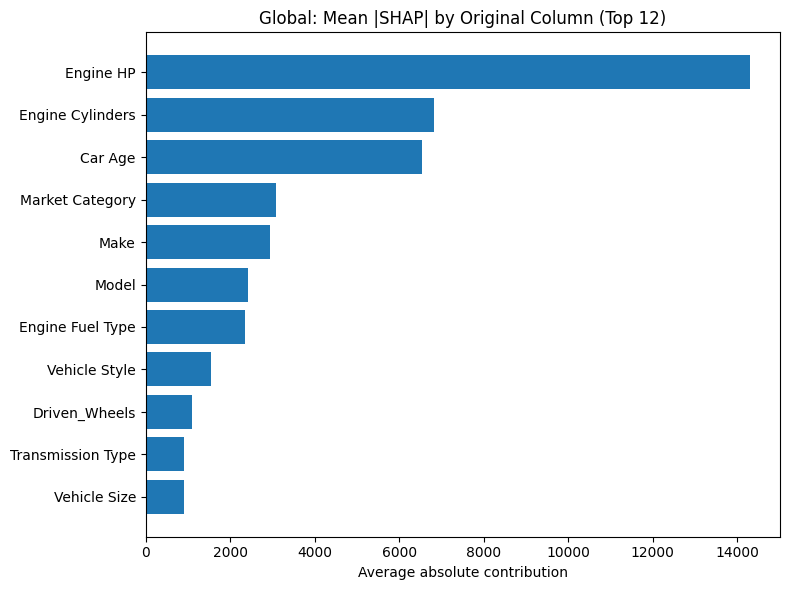

In [20]:
# ============================================
# SHAP Single‑Car Explainer for RF Pipeline
# ============================================

# If SHAP is not installed, uncomment:
# !pip install shap -q

import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# -----------------------------
# 1) Grab fitted components
# -----------------------------
pre = model.named_steps["preprocessor"]
reg = model.named_steps["regressor"]

# Derive categorical & numeric column lists from the fitted preprocessor
# (does NOT rely on previously-defined variables like cat_cols/num_cols)
try:
    cat_cols = list(pre.named_transformers_["cat"].feature_names_in_)
except Exception:
    # Fallback to the first transformer spec if needed
    cat_cols = list(pre.transformers_[0][2])

try:
    # The numeric transformer tuple is named "num" per the earlier pipeline
    num_cols = list(pre.transformers_[1][2])
except Exception:
    num_cols = []

# -----------------------------
# 2) Build transformed feature names
# -----------------------------
ohe = pre.named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(input_features=cat_cols).tolist()
num_feature_names = list(num_cols)
feat_names = cat_feature_names + num_feature_names

# -----------------------------
# 3) Transform the test set
# -----------------------------
X_test_t = pre.transform(X_test)
# Convert to dense for SHAP plotting convenience (OK for small/moderate subsets)
if hasattr(X_test_t, "toarray"):
    X_test_t_dense = X_test_t.toarray()
else:
    X_test_t_dense = X_test_t

# Sanity: align feature-name length with transformed columns
n_features = X_test_t_dense.shape[1]
if len(feat_names) != n_features:
    # Defensive alignment in case of partial reruns or pipeline tweaks
    m = min(len(feat_names), n_features)
    feat_names = feat_names[:m]
    X_test_t_dense = X_test_t_dense[:, :m]

# -----------------------------
# 4) Pick a single car to explain
# -----------------------------
idx = 0  # change this index to explain a different row from X_test

x_row = X_test.iloc[[idx]]           # original (untransformed) row as DataFrame
x_row_t = X_test_t_dense[[idx], :]   # transformed row (1, n_features)
true_price = float(y_test.iloc[idx])
pred_price = float(model.predict(x_row)[0])

print(f"True MSRP:      ${true_price:,.0f}")
print(f"Predicted MSRP: ${pred_price:,.0f}")

# -----------------------------
# 5) SHAP: local explanation
# -----------------------------
# Use TreeExplainer on the fitted RandomForestRegressor
explainer = shap.TreeExplainer(reg)

# Compute SHAP values for the single transformed row
sv_row = explainer(x_row_t)

# Wrap into a SHAP Explanation object with feature names & original data
sv_row_exp = shap.Explanation(
    values=sv_row.values[0],            # (n_features,)
    base_values=sv_row.base_values[0],  # scalar baseline
    data=x_row_t[0],                    # transformed feature values
    feature_names=feat_names
)

# Waterfall: shows how features push prediction up/down from baseline
shap.plots.waterfall(sv_row_exp, max_display=20)

# -----------------------------
# 6) SHAP: global view (beeswarm)
# -----------------------------
# Use a manageable sample for speed
sample_n = min(1000, X_test_t_dense.shape[0])
rng = np.random.default_rng(42)
sample_idx = rng.choice(X_test_t_dense.shape[0], size=sample_n, replace=False)

X_sample_t = X_test_t_dense[sample_idx]
sv_sample = explainer(X_sample_t)

sv_sample_exp = shap.Explanation(
    values=sv_sample.values,            # (n_sample, n_features)
    base_values=sv_sample.base_values,  # (n_sample,)
    data=X_sample_t,                    # (n_sample, n_features)
    feature_names=feat_names
)

# Global importance across the sample (encoded-feature level)
shap.plots.beeswarm(sv_sample_exp, max_display=25)

# -----------------------------
# 7) Aggregate SHAP to original columns
#    (so one-hot categories roll up to their source column)
# -----------------------------
def original_col_name(encoded_name: str) -> str:
    # Numeric passthrough: keep as-is
    if encoded_name in num_feature_names:
        return encoded_name
    # Categorical one-hot: "<col>_<category>"
    for col in cat_cols:
        prefix = f"{col}_"
        if encoded_name.startswith(prefix):
            return col
    return encoded_name  # fallback

# Single-row aggregation (signed sum = net push up/down)
row_contrib = pd.DataFrame({
    "encoded_feature": feat_names,
    "shap_value": sv_row_exp.values
})
row_contrib["orig_col"] = row_contrib["encoded_feature"].apply(original_col_name)
row_agg = (row_contrib
           .groupby("orig_col", as_index=False)["shap_value"]
           .sum()
           .sort_values("shap_value", ascending=False))

print("\nSingle-car SHAP (net contribution by original column):")
display(row_agg.head(15))

# Global aggregation (mean absolute SHAP per original column)
sv_abs = np.abs(sv_sample_exp.values)                  # (n_sample, n_features)
mean_abs_by_feat = sv_abs.mean(axis=0)                 # (n_features,)
global_contrib = pd.DataFrame({
    "encoded_feature": feat_names,
    "mean_abs_shap": mean_abs_by_feat
})
global_contrib["orig_col"] = global_contrib["encoded_feature"].apply(original_col_name)
global_agg = (global_contrib
              .groupby("orig_col", as_index=False)["mean_abs_shap"]
              .sum()
              .sort_values("mean_abs_shap", ascending=False))

print("\nGlobal SHAP (importance by original column):")
display(global_agg.head(20))

# -----------------------------
# 8) Optional: simple bar plots
# -----------------------------
plt.figure(figsize=(8, 6))
plot_row = row_agg.head(12).iloc[::-1]
plt.barh(plot_row["orig_col"], plot_row["shap_value"])
plt.title("Single Car: Net SHAP by Original Column (Top 12)")
plt.xlabel("Net contribution to prediction")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plot_global = global_agg.head(12).iloc[::-1]
plt.barh(plot_global["orig_col"], plot_global["mean_abs_shap"])
plt.title("Global: Mean |SHAP| by Original Column (Top 12)")
plt.xlabel("Average absolute contribution")
plt.tight_layout()
plt.show()


Detect Under/Over‑Priced Cars (Residual Analysis)

Flag
Fair           2345
Underpriced      26
Overpriced       12
Name: count, dtype: int64


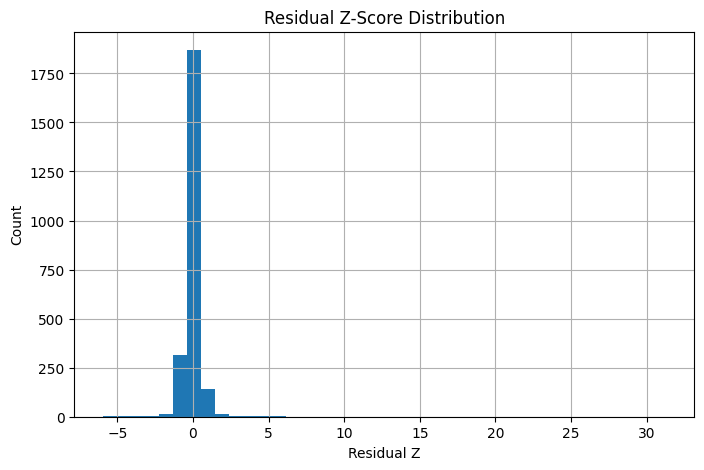

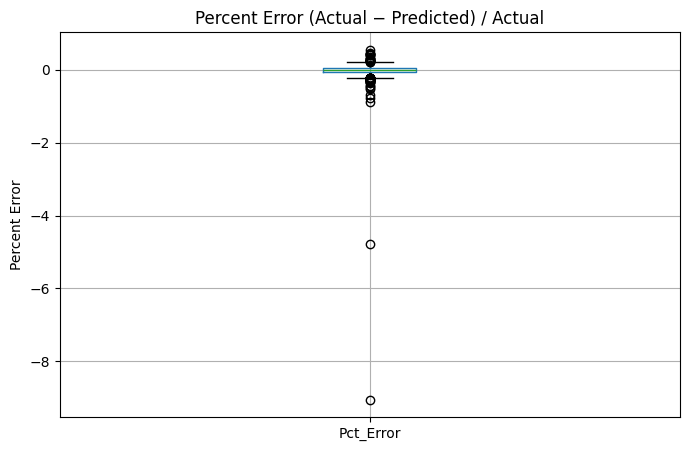


Top 10 Underpriced (highest positive residual):


,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,Market Category,Car Age,Actual_MSRP,Pred_MSRP,Residual,Pct_Error,Residual_Z,Flag
4024,Ferrari,Enzo,premium unleaded (required),660.0,12.0,AUTOMATED_MANUAL,rear wheel drive,Compact,Coupe,"Exotic,High-Performance",14,643330,360939.3800,282390.6200,0.438951,31.295120,Underpriced
2858,Bentley,Continental GT3-R,premium unleaded (required),572.0,8.0,AUTOMATIC,all wheel drive,Midsize,Coupe,"Exotic,Factory Tuner,Luxury,High-Performance",2,337000,200624.9500,136375.0500,0.404674,15.088926,Underpriced
4649,Ferrari,F430,premium unleaded (required),483.0,8.0,AUTOMATED_MANUAL,rear wheel drive,Compact,Coupe,"Exotic,Factory Tuner,High-Performance",10,234945,133805.1300,101139.8700,0.430483,11.178191,Underpriced
303,Ferrari,360,premium unleaded (required),425.0,8.0,AUTOMATED_MANUAL,rear wheel drive,Compact,Coupe,"Exotic,Factory Tuner,High-Performance",13,187124,101548.9650,85575.0350,0.457317,9.450658,Underpriced
2340,Porsche,Carrera GT,premium unleaded (required),605.0,10.0,MANUAL,rear wheel drive,Compact,Convertible,"Exotic,Luxury,High-Performance",12,440000,369558.9400,70441.0600,0.160093,7.770945,Underpriced
9689,Mercedes-Benz,SLS AMG GT,premium unleaded (required),622.0,8.0,AUTOMATED_MANUAL,rear wheel drive,Compact,Coupe,"Exotic,Factory Tuner,Luxury,High-Performance",3,275000,213375.9000,61624.1000,0.224088,6.792355,Underpriced
473,Ferrari,458 Italia,premium unleaded (required),597.0,8.0,AUTOMATED_MANUAL,rear wheel drive,Compact,Coupe,"Exotic,High-Performance",2,291744,240992.6200,50751.3800,0.173959,5.585598,Underpriced
7443,Rolls-Royce,Park Ward,premium unleaded (required),322.0,12.0,AUTOMATIC,rear wheel drive,Large,Sedan,"Exotic,Luxury",16,259900,210802.2600,49097.7400,0.188910,5.402061,Underpriced
7444,Rolls-Royce,Park Ward,premium unleaded (required),322.0,12.0,AUTOMATIC,rear wheel drive,Large,Sedan,"Exotic,Luxury",15,262990,214487.8600,48502.1400,0.184426,5.335956,Underpriced
5071,Mercedes-Benz,G-Class,premium unleaded (required),416.0,8.0,AUTOMATIC,four wheel drive,Midsize,4dr SUV,Luxury,1,119900,72833.0925,47066.9075,0.392551,5.176660,Underpriced



Top 10 Overpriced (most negative residual):


,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,Market Category,Car Age,Actual_MSRP,Pred_MSRP,Residual,Pct_Error,Residual_Z,Flag
3522,Aston Martin,DB7,premium unleaded (required),435.0,12.0,MANUAL,rear wheel drive,Compact,Coupe,"Exotic,Factory Tuner,High-Performance",14,156300,209722.100000,-53422.100000,-0.341792,-5.976564,Overpriced
10528,Volkswagen,Touareg 2,diesel,310.0,10.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,"Crossover,Luxury,Diesel",9,68340,120445.640000,-52105.640000,-0.762447,-5.830451,Overpriced
8302,Land Rover,Range Rover,premium unleaded (required),510.0,8.0,AUTOMATIC,four wheel drive,Large,4dr SUV,"Luxury,High-Performance",3,100100,144365.380833,-44265.380833,-0.442212,-4.960265,Overpriced
761,BMW,8 Series,regular unleaded,372.0,12.0,MANUAL,rear wheel drive,Midsize,Coupe,"Factory Tuner,Luxury,Performance",22,8488,49162.400000,-40674.400000,-4.791989,-4.561704,Overpriced
1459,Bentley,Arnage,premium unleaded (required),450.0,8.0,AUTOMATIC,rear wheel drive,Large,Sedan,"Exotic,Luxury,Performance",8,224990,264170.000000,-39180.000000,-0.174141,-4.395841,Overpriced
1457,Bentley,Arnage,premium unleaded (required),450.0,8.0,AUTOMATIC,rear wheel drive,Large,Sedan,"Exotic,Luxury,Performance",9,221990,259540.000000,-37550.000000,-0.169152,-4.214928,Overpriced
8310,Land Rover,Range Rover,flex-fuel (premium unleaded required/E85),510.0,8.0,AUTOMATIC,four wheel drive,Large,4dr SUV,"Flex Fuel,Luxury,High-Performance",2,101995,134757.645238,-32762.645238,-0.321218,-3.683582,Overpriced
4257,Lotus,Evora 400,premium unleaded (required),400.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,"Exotic,High-Performance",0,91900,122341.156667,-30441.156667,-0.331242,-3.425921,Overpriced
3526,Aston Martin,DB9 GT,premium unleaded (required),540.0,12.0,AUTOMATIC,rear wheel drive,Midsize,Coupe,"Exotic,High-Performance",1,198250,227325.240000,-29075.240000,-0.146659,-3.274319,Overpriced
673,Mercedes-Benz,600-Class,regular unleaded,389.0,12.0,AUTOMATIC,rear wheel drive,Large,Coupe,Luxury,24,3211,32276.860000,-29065.860000,-9.051965,-3.273278,Overpriced



Brand/Model summary (top 20 by mean residual):


,Make,Model,n,mean_residual,mean_pct_err,frac_under,frac_over
222,Ferrari,Enzo,1,282390.620000,0.438951,1.00,0.0
74,Bentley,Continental GT3-R,1,136375.050000,0.404674,1.00,0.0
581,Porsche,Carrera GT,1,70441.060000,0.160093,1.00,0.0
223,Ferrari,F430,2,52356.345000,0.223462,0.50,0.0
586,Rolls-Royce,Park Ward,2,48799.940000,0.186668,1.00,0.0
462,McLaren,650S Spider,1,44168.606667,0.157618,1.00,0.0
585,Rolls-Royce,Ghost,2,35880.375000,0.119731,1.00,0.0
477,Mercedes-Benz,G-Class,2,30426.228750,0.246551,0.50,0.0
494,Mercedes-Benz,SLS AMG GT,2,30063.820000,0.108412,0.50,0.0
372,Lamborghini,Aventador,2,25232.800000,0.047404,0.50,0.0


Saved: flagged_pricing_opportunities.csv


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Predictions & residuals on the held-out test set
y_pred = model.predict(X_test)
residual = y_test.values - y_pred
pct_err = residual / (y_test.values + 1e-9)  # avoid div-by-zero

res_df = X_test.copy()
res_df["Actual_MSRP"] = y_test.values
res_df["Pred_MSRP"]  = y_pred
res_df["Residual"]   = residual
res_df["Pct_Error"]  = pct_err

# 2) Standardize residuals (z-score)
mu = res_df["Residual"].mean()
sd = res_df["Residual"].std(ddof=1)
res_df["Residual_Z"] = (res_df["Residual"] - mu) / (sd if sd > 0 else 1.0)

# 3) Flag thresholds (tune as needed)
Z_UNDERPRICED = 2.0   # > +2σ residual => actual >> predicted (underpriced vs model)
Z_OVERPRICED  = -2.0  # < -2σ residual => actual << predicted (overpriced vs model)

res_df["Flag"] = "Fair"
res_df.loc[res_df["Residual_Z"] >= Z_UNDERPRICED, "Flag"] = "Underpriced"
res_df.loc[res_df["Residual_Z"] <= Z_OVERPRICED,  "Flag"] = "Overpriced"

print(res_df["Flag"].value_counts())

# 4) Quick visuals
plt.figure(figsize=(8,5))
res_df["Residual_Z"].hist(bins=40)
plt.title("Residual Z-Score Distribution")
plt.xlabel("Residual Z")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
res_df.boxplot(column="Pct_Error")
plt.title("Percent Error (Actual − Predicted) / Actual")
plt.ylabel("Percent Error")
plt.show()

# 5) Top under/over‑priced examples
print("\nTop 10 Underpriced (highest positive residual):")
display(res_df.sort_values("Residual_Z", ascending=False).head(10))

print("\nTop 10 Overpriced (most negative residual):")
display(res_df.sort_values("Residual_Z", ascending=True).head(10))

# 6) Brand/Model summaries (requires columns to exist in your data)
group_cols = [c for c in ["Make", "Model"] if c in res_df.columns]
if group_cols:
    brand_summary = (
        res_df.groupby(group_cols, as_index=False)
              .agg(
                  n=("Actual_MSRP", "size"),
                  mean_residual=("Residual", "mean"),
                  mean_pct_err=("Pct_Error", "mean"),
                  frac_under=("Flag", lambda s: np.mean(s=="Underpriced")),
                  frac_over =("Flag", lambda s: np.mean(s=="Overpriced"))
              )
              .sort_values("mean_residual", ascending=False)
    )
    print("\nBrand/Model summary (top 20 by mean residual):")
    display(brand_summary.head(20))
else:
    print("\nMake/Model columns were not found; skipping brand/model summary.")

# 7) Export flagged cars for action (CSV)
out_cols = [c for c in ["Make","Model","Year","Engine Fuel Type","Engine HP",
                        "Engine Cylinders","Transmission Type","Driven_Wheels",
                        "Vehicle Size","Vehicle Style","Market Category"]
            if c in res_df.columns]
export_cols = out_cols + ["Actual_MSRP","Pred_MSRP","Residual","Residual_Z","Pct_Error","Flag"]

flagged = res_df.loc[res_df["Flag"].isin(["Underpriced","Overpriced"]), export_cols]
flagged.to_csv("flagged_pricing_opportunities.csv", index=False)
print("Saved: flagged_pricing_opportunities.csv")


Underpriced list → prioritize acquisitions or highlight “hot deals.”

Overpriced list → suggest markdowns to sellers or hide poor‑value listings.

Brand/Model summary → spot systematic bias: e.g., your model (or market) over/under‑values certain trims/brands.

Brand Premium Index (Hedonic Pricing Analysis)

In [23]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# 1) Copy & prep
df_brand = df.copy()

# Numeric coercions
for col in ["Year", "MSRP", "Engine HP", "Engine Cylinders"]:
    if col in df_brand.columns:
        df_brand[col] = pd.to_numeric(df_brand[col], errors="coerce")

# Car Age
latest_year = df_brand["Year"].max()
df_brand["Car Age"] = latest_year - df_brand["Year"]

# Basic filtering for stability
df_brand = df_brand[
    (df_brand["MSRP"].notna()) &
    (df_brand["Engine HP"].notna()) &
    (df_brand["Engine Cylinders"].notna()) &
    (df_brand["Car Age"].notna()) &
    (df_brand["MSRP"] < 300_000)
].copy()

# Ensure Make is categorical
df_brand["Make"] = df_brand["Make"].astype("category")

# Optional: choose a specific baseline brand (must exist in data)
# baseline_brand = "Ford"
# if baseline_brand in df_brand["Make"].cat.categories:
#     df_brand["Make"] = df_brand["Make"].cat.reorder_categories(
#         [baseline_brand] + [c for c in df_brand["Make"].cat.categories if c != baseline_brand],
#         ordered=True
#     )

# 2) Fit OLS with brand fixed effects via C(Make)
# Use Q("col name") for columns that contain spaces
formula = 'MSRP ~ Q("Engine HP") + Q("Engine Cylinders") + Q("Car Age") + C(Make)'
model_ols = smf.ols(formula, data=df_brand).fit()

print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1668.
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:32:54   Log-Likelihood:            -1.2907e+05
No. Observations:               11819   AIC:                         2.582e+05
Df Residuals:                   11770   BIC:                         2.586e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [24]:
# statsmodels encodes brand dummies as: C(Make)[T.<Brand>]
params = model_ols.params

# Find baseline brand: the one WITHOUT a C(Make)[T.*] coefficient
all_brands = list(df_brand["Make"].cat.categories)
coef_brands = [b for b in all_brands if f'C(Make)[T.{b}]' in params.index]
baseline = [b for b in all_brands if b not in coef_brands]
baseline_brand = baseline[0] if baseline else "(baseline unknown)"

brand_rows = []
for b in all_brands:
    if b == baseline_brand:
        premium = 0.0
    else:
        premium = params.get(f'C(Make)[T.{b}]', np.nan)
    brand_rows.append({"Brand": b, f"Premium_vs_{baseline_brand}": premium})

brand_premium_df = pd.DataFrame(brand_rows).sort_values(
    by=f"Premium_vs_{baseline_brand}", ascending=False
).reset_index(drop=True)

print(f"Baseline brand: {baseline_brand}")
print("Top brands by estimated price premium (controlling for specs):")
display(brand_premium_df.head(10))

print("\nLowest brands by estimated price premium:")
display(brand_premium_df.tail(10))

# Save
brand_premium_df.to_csv("brand_premium_index.csv", index=False)
print("Saved: brand_premium_index.csv")


Baseline brand: Acura
Top brands by estimated price premium (controlling for specs):


,Brand,Premium_vs_Acura
0,Rolls-Royce,191656.169744
1,Spyker,154520.474374
2,McLaren,144996.459111
3,Ferrari,143731.266082
4,Bentley,143207.642159
5,Lamborghini,135734.885049
6,Aston Martin,117151.501819
7,Tesla,51744.052000
8,Maserati,49399.352600
9,Porsche,36557.352585



Lowest brands by estimated price premium:


,Brand,Premium_vs_Acura
36,Chrysler,-4582.002595
37,Hyundai,-5768.741297
38,GMC,-6512.938539
39,Kia,-6609.404777
40,Toyota,-6888.868258
41,Chevrolet,-7219.524868
42,Ford,-7273.510223
43,Nissan,-7585.792468
44,Dodge,-8970.569351
45,Genesis,-10479.395240


Saved: brand_premium_index.csv


In [25]:
import statsmodels.api as sm

df_brand = df.copy()
for col in ["Year","MSRP","Engine HP","Engine Cylinders"]:
    if col in df_brand.columns:
        df_brand[col] = pd.to_numeric(df_brand[col], errors="coerce")

latest_year = df_brand["Year"].max()
df_brand["Car Age"] = latest_year - df_brand["Year"]

df_brand = df_brand[
    (df_brand["MSRP"].notna()) &
    (df_brand["Engine HP"].notna()) &
    (df_brand["Engine Cylinders"].notna()) &
    (df_brand["Car Age"].notna()) &
    (df_brand["MSRP"] < 300_000)
].copy()

X = pd.get_dummies(
    df_brand[["Make","Engine HP","Engine Cylinders","Car Age"]],
    drop_first=True
)
y = df_brand["MSRP"]

# Ensure pure numeric float dtypes
X = X.apply(pd.to_numeric, errors="coerce").astype(np.float64)
y = pd.to_numeric(y, errors="coerce").astype(np.float64)

# Drop any rows with NaN that slipped in
valid = X.notna().all(axis=1) & y.notna()
X = X.loc[valid]
y = y.loc[valid]

X = sm.add_constant(X).astype(np.float64)
model_ols = sm.OLS(y.values, X.values).fit()
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1668.
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:33:38   Log-Likelihood:            -1.2907e+05
No. Observations:               11819   AIC:                         2.582e+05
Df Residuals:                   11770   BIC:                         2.586e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1068.4768    987.811      1.082      0.2

Fuel Type Market Shift Analysis

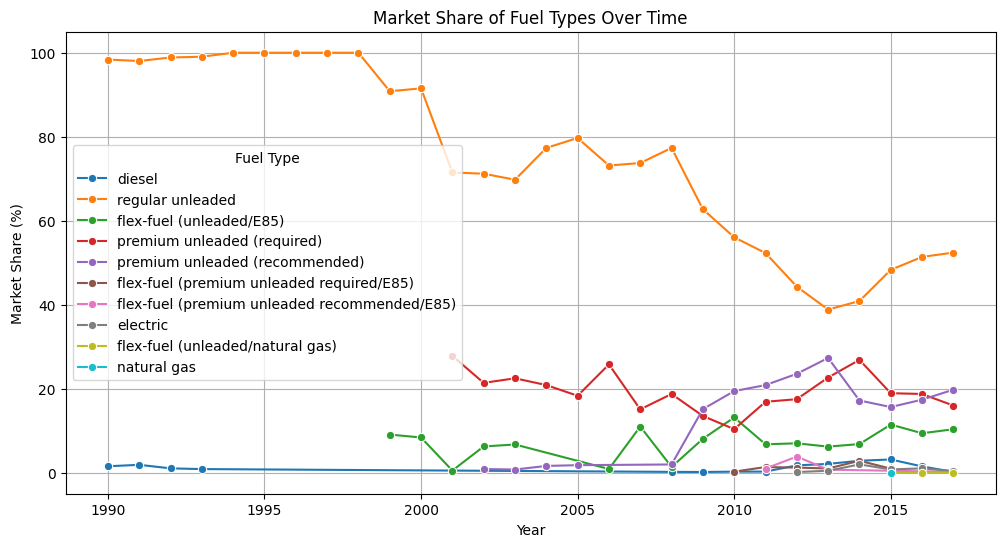

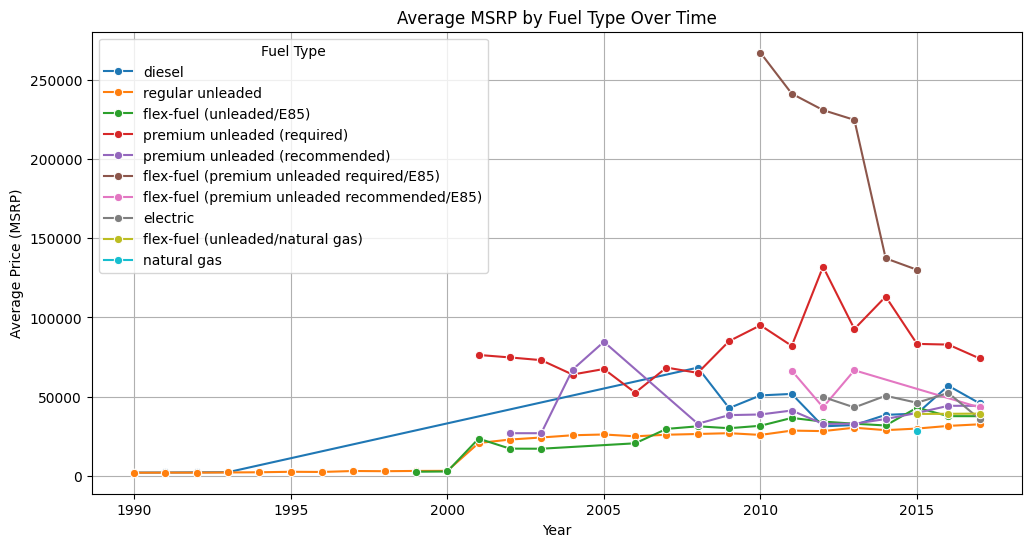

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Prepare the data
df_fuel = df.copy()

# Ensure numeric year
df_fuel["Year"] = pd.to_numeric(df_fuel["Year"], errors="coerce")

# Keep only rows with required fields
df_fuel = df_fuel[
    df_fuel["Year"].notna() &
    df_fuel["Engine Fuel Type"].notna() &
    df_fuel["MSRP"].notna()
]

# Optional: filter extreme prices
df_fuel = df_fuel[df_fuel["MSRP"] < 300_000]

# 2) Market share by year and fuel type
fuel_counts = (
    df_fuel.groupby(["Year", "Engine Fuel Type"])
           .size()
           .reset_index(name="Count")
)
total_per_year = fuel_counts.groupby("Year")["Count"].transform("sum")
fuel_counts["Market Share (%)"] = 100 * fuel_counts["Count"] / total_per_year

# 3) Average MSRP by year and fuel type
fuel_prices = (
    df_fuel.groupby(["Year", "Engine Fuel Type"])["MSRP"]
           .mean()
           .reset_index(name="Avg MSRP")
)

# 4) Plot: Market share trends
plt.figure(figsize=(12,6))
sns.lineplot(data=fuel_counts, x="Year", y="Market Share (%)", hue="Engine Fuel Type", marker="o")
plt.title("Market Share of Fuel Types Over Time")
plt.ylabel("Market Share (%)")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Fuel Type")
plt.show()

# 5) Plot: Average price trends
plt.figure(figsize=(12,6))
sns.lineplot(data=fuel_prices, x="Year", y="Avg MSRP", hue="Engine Fuel Type", marker="o")
plt.title("Average MSRP by Fuel Type Over Time")
plt.ylabel("Average Price (MSRP)")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Fuel Type")
plt.show()


The rise of EVs and hybrids (market share increases).

The decline of diesel in certain markets.

Whether EVs consistently hold higher average MSRP compared to gasoline.

If price gaps between fuel types are narrowing over time.